# Análise de Venda de Medicamentos Controlados e Antimicrobianos - Medicamentos Industrializados

Projeto de análise de vendas de medicamentos controlados e antimicrobianos exclusivamente industrializados na Região Metropolitana da Baixada Santista (RMBS) composta por nove municípios no litoral do estado de São Paulo, através de dados extraídos do Sistema Nacional de Gerenciamento de Produtos Controlados (SNGPC) e disponibilizados no [portal de dados abertos](https://dados.gov.br/dados/conjuntos-dados/venda-de-medicamentos-controlados-e-antimicrobianos---medicamentos-industrializados) da Agência Nacional de Vigilância Sanitária (Anvisa). Através da análise das informações de vendas, dados geográricos, perfil de pacientes e características de medicamentos, aplicando a metodologia CRISP-DM, o objetivo é extrair insights de negócios, sugerir soluções aos problemas identificados e apresentar propostas de aprimoramento.

## Demanda do negócio

A análise dos dados possibilitará a obtenção de insigths, a identificação de tendências e a proposição de soluções estratégicas. Além disso, esse processo permitirá direcionar recursos de forma mais eficaz para áreas de maior demanda, aprimorando, assim, a gestão logística e o controle de estoque. Para atender a esses objetivos, foi definida as seguintes demandas de negócio:

- Compreender as tendências, padrões e características das vendas farmacêuticas.
- Construção de perfis de pacientes com base nos mendicamentos receitados.
- Compreender a demanda de medicamentos com base no perfil dos pacientes, por tempo e por município.
- Obter insights, identificar oportunidades e propor soluções a problemas.
- Elaboração de painel de informações de medicamentos baseado em filtros.

## Compreensão dos dados

Os dados que serão utilizados na análise compreendem o período de uma ano, outubro de 2020 até setembro de 2021, que integram um conjunto de doze arquivos em formato "CSV". Os dados foram extraídos do Sistema Nacional de Gerenciamento de Produtos Controlados (SNGPC), provenientes apenas de farmácias e drogarias privadas que periodicamente devem enviar os dados a respeito de todas as vendas realizadas de medicamentos sujeitos à escrituração no SNGPC. Os dados foram disponibilizados no [portal de dados abertos](https://dados.gov.br/dados/conjuntos-dados/venda-de-medicamentos-controlados-e-antimicrobianos---medicamentos-industrializados) da Agência Nacional de Vigilância Sanitária (Anvisa).

## Tópicos da análise

- Construção de perfil de pacientes.
- Distribuição de pacientes por município.
- Demanda de medicamentos por paciente.
- Demanda de medicamentos por município.
- Demanda de medicamentos durante o ano.

## Dicionário de dados

**ANO_VENDA:** Ano da venda do medicamento.<br>
**MES_VENDA:** Mês da venda do medicamento.<br>
**UF_VENDA:** Unidade Federativa do endereço da farmácia ou drogaria, cadastrado no banco de dados da Anvisa, representando a UF onde ocorreu a venda.<br>
**MUNICIPIO_VENDA:** Município do endereço da farmácia ou drogaria, cadastrado no banco de dados da Anvisa, representando o Município onde ocorreu a venda.<br>
**PRINCIPIO_ATIVO:** Nome do princípio ativo do medicamento industrializado, conforme cadastrado no registro do medicamento, no banco de dados da Anvisa.<br>Quando um medicamento tem mais de um princípio ativo, cada um deles é separado pelo caractere “+”.<br>Ex.: “PRINCÍPIO ATIVO 1 + PRINCÍPIO ATIVO 2”<br>
**DESCRICAO_APRESENTACAO:** Uma Apresentação de Medicamento representa O modo como um medicamento é apresentado na embalagem. Exemplo: Medicamento X, pode ter duas apresentações diferentes:<br>• Apresentação 1:<br>Uma caixa com 1 blister de alumínio com 20 comprimidos, cada comprimido com 5 mg de princípio ativo.<br>Nesse caso, a descrição da apresentação seria:<br>“5 MG COM CT BL AL X 20”<br>• Apresentação 2:<br>Uma caixa com 1 frasco de vidro com 50 mL de um xarope, com concentração do princípio ativo de 15 mg por mL.<br>Nesse caso, a descrição da apresentação seria:<br>15MG/ML XPE CT FR VD x 50 ML<br>Esses exemplos representam descrições de apresentações diferentes para um mesmo medicamento.<br>Os termos utilizados na descrição das apresentações seguem o disposto no Vocabulário Controlado da Anvisa, disponível no link:<br>[http://portal.anvisa.gov.br/documents/33836/2501339/Vocabul%C3%A1rio+Controlado/fd8fdf08-45dc-402a-8dcf-fbb3fd21ca75](http://portal.anvisa.gov.br/documents/33836/2501339/Vocabul%C3%A1rio+Controlado/fd8fdf08-45dc-402a-8dcf-fbb3fd21ca75)<br>
**QTD_VENDIDA:** Quantidade vendida de caixas ou frascos do medicamento.<br>
**UNIDADE_MEDIDA:** Indica se a quantidade vendida do medicamento foi de caixas ou frascos.<br>
**CONSELHO_PRESCRITOR:** Conselho de Classe do profissional que prescreveu o medicamento vendido.<br>
**UF_CONSELHO_PRESCRITOR:** Unidade Federativa do Conselho de Classe do profissional que prescreveu o medicamento vendido.<br>
**TIPO_RECEITUARIO:** Tipo de receituário utilizado na prescrição.<br>Valores e respectivos tipos de receituário:<br>1 – Receita de Controle Especial em 2 vias (Receita Branca);<br>2 – Notificação de Receita B (Notificação Azul);<br>3 – Notificação de Receita Especial (Notificação Branca);<br>4 – Notificação de Receita A (Notificação Amarela);<br>5 – Receita Antimicrobiano em 2 vias.<br>
**CID10:** Classificação Internacional de Doença (aplicável apenas a medicamentos antimicrobianos).<br>
**SEXO:** Sexo do paciente (aplicável apenas a medicamentos antimicrobianos).<br>Valor 1 para o sexo masculino, valor 2 para o sexo feminino.<br>
**IDADE:** Valor numérico que representa a idade do paciente, em meses ou anos (aplicável apenas a medicamentos antimicrobianos).<br>
**UNIDADE_IDADE:** Unidade de medida da idade do paciente, que pode ser em meses ou anos (aplicável apenas a medicamentos antimicrobianos).<br>Valor 1 para unidade de medida em anos, valor 2 para unidade de medida em meses.<br>

## Sumário

-------------------------------------


## 1. Importação de bibliotecas

In [1]:
# Importação de pacotes e definição de parâmetros globais

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gc
import funcoes as fn

from tabulate import tabulate
from statistics import mode

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')


## 2. Carregamento dos dados

In [2]:
# Efetuando a limpeza de memória antes do carregamento dos dados
gc.collect()

# Caminho do arquivo de dados
caminho = 'dados/ABT/00/'

# Criando um dataframe a partir dos arquivos no diretório de dados
df = pd.read_parquet(caminho, engine='pyarrow')


## 3. Análise do dataframe

In [3]:
# Informações do dataframe como nome das colunas, contagem de
# de dados, tipo de dados e quantidade de memória utilizada

df.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736196 entries, 0 to 736195
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   ANO_VENDA               736196 non-null  int32   
 1   MES_VENDA               736196 non-null  int32   
 2   UF_VENDA                736196 non-null  object  
 3   MUNICIPIO_VENDA         736196 non-null  object  
 4   PRINCIPIO_ATIVO         735816 non-null  object  
 5   DESCRICAO_APRESENTACAO  736196 non-null  object  
 6   QTD_VENDIDA             736196 non-null  int32   
 7   UNIDADE_MEDIDA          736196 non-null  object  
 8   CONSELHO_PRESCRITOR     736196 non-null  object  
 9   UF_CONSELHO_PRESCRITOR  736196 non-null  object  
 10  TIPO_RECEITUARIO        736196 non-null  object  
 11  CID10                   49 non-null      object  
 12  SEXO                    615105 non-null  float64 
 13  IDADE                   615105 non-null  float64 
 14  UNID

In [4]:
print(f'\nQuantidade de linhas (registros):  {df.shape[0]}')
print(f'\nQuantidade de colunas (variáveis): {df.shape[1]}')



Quantidade de linhas (registros):  736196

Quantidade de colunas (variáveis): 17


In [5]:
# Agrupar os dados por ano/mês e exibir a quantidade de registros
df_ano_mes = df.groupby(['ANO_VENDA', 'MES_VENDA']).size()
df_ano_mes = pd.DataFrame(df_ano_mes)
df_ano_mes.rename(columns={0: 'QTDE'}, inplace=True)
df_ano_mes['%'] = df_ano_mes['QTDE']/df_ano_mes['QTDE'].sum()*100

df_ano_mes


QTDE         %
ANO_VENDA MES_VENDA                 
2020      10         61346  8.332835
          11         61844  8.400480
          12         63109  8.572310
2021      1          65856  8.945444
          2          59813  8.124603
          3          66270  9.001679
          4          56797  7.714929
          5          59675  8.105858
          6          59026  8.017702
          7          60118  8.166032
          8          60468  8.213574
          9          61874  8.404555

In [6]:
# Primeiras linhas do dataframe

df.head()


,ANO_VENDA,MES_VENDA,UF_VENDA,MUNICIPIO_VENDA,PRINCIPIO_ATIVO,DESCRICAO_APRESENTACAO,QTD_VENDIDA,UNIDADE_MEDIDA,CONSELHO_PRESCRITOR,UF_CONSELHO_PRESCRITOR,TIPO_RECEITUARIO,CID10,SEXO,IDADE,UNIDADE_IDADE,DATA_PROC,DATA_REF
0,2020,10,SP,MONGAGUÁ,ACETATO DE PREDNISOLONA + GATIFLOXACINO SESQUI...,3 MG/ML + 10 MG/ML SUS OFT CT FR GOT PLAS OPC ...,1,CAIXA,CRM,SP,5,None,1.0,69.0,1.0,2023-10-25,2020-10-01
1,2020,10,SP,MONGAGUÁ,ACETATO DE PREDNISOLONA + GATIFLOXACINO SESQUI...,3 MG/ML + 10 MG/ML SUS OFT CT FR GOT PLAS OPC ...,1,CAIXA,CRM,SP,5,None,1.0,73.0,1.0,2023-10-25,2020-10-01
2,2020,10,SP,MONGAGUÁ,ACETATO DE PREDNISOLONA + GATIFLOXACINO SESQUI...,3 MG/ML + 10 MG/ML SUS OFT CT FR GOT PLAS OPC ...,1,CAIXA,CRM,SP,5,None,1.0,78.0,1.0,2023-10-25,2020-10-01
3,2020,10,SP,MONGAGUÁ,ACETATO DE PREDNISOLONA + GATIFLOXACINO SESQUI...,3 MG/ML + 10 MG/ML SUS OFT CT FR GOT PLAS OPC ...,1,CAIXA,CRM,SP,5,None,2.0,18.0,1.0,2023-10-25,2020-10-01
4,2020,10,SP,MONGAGUÁ,ACETATO DE PREDNISOLONA + GATIFLOXACINO SESQUI...,3 MG/ML + 10 MG/ML SUS OFT CT FR GOT PLAS OPC ...,1,CAIXA,CRM,SP,5,None,2.0,38.0,1.0,2023-10-25,2020-10-01


In [7]:
# Últimas linhas do dataframe

df.tail()


,ANO_VENDA,MES_VENDA,UF_VENDA,MUNICIPIO_VENDA,PRINCIPIO_ATIVO,DESCRICAO_APRESENTACAO,QTD_VENDIDA,UNIDADE_MEDIDA,CONSELHO_PRESCRITOR,UF_CONSELHO_PRESCRITOR,TIPO_RECEITUARIO,CID10,SEXO,IDADE,UNIDADE_IDADE,DATA_PROC,DATA_REF
736191,2021,9,SP,SANTOS,None,3 MG/ML SOL OFT CT FR PLAS OPC GOT X 5 ML,6,FRASCO,CRMV,SP,5,None,NaN,NaN,NaN,2023-10-25,2021-09-01
736192,2021,9,SP,SANTOS,None,3 MG/ML SOL OFT CT FR PLAS OPC GOT X 5 ML,1,FRASCO,CRO,SP,5,None,2.0,35.0,1.0,2023-10-25,2021-09-01
736193,2021,9,SP,SANTOS,None,3 MG/ML SOL OFT CT FR PLAS OPC GOT X 5 ML,3,FRASCO,CRO,SP,5,None,2.0,45.0,1.0,2023-10-25,2021-09-01
736194,2021,9,SP,SANTOS,None,3 MG/ML SOL OFT CT FR PLAS OPC GOT X 5 ML,1,FRASCO,CRO,SP,5,None,2.0,91.0,1.0,2023-10-25,2021-09-01
736195,2021,9,SP,SANTOS,None,500 MG COM REV CT 2 BL AL PVDC LEIT X 7,1,CAIXA,CRM,SP,5,None,1.0,22.0,1.0,2023-10-25,2021-09-01


In [8]:
fn.gerar_metadados(df)

,Variável,Tipo,Qtde de nulos,% de nulos,Cardinalidade
0,ANO_VENDA,int32,0,0.00,2
1,MES_VENDA,int32,0,0.00,12
2,UF_VENDA,object,0,0.00,1
3,MUNICIPIO_VENDA,object,0,0.00,9
4,PRINCIPIO_ATIVO,object,380,0.05,293
5,DESCRICAO_APRESENTACAO,object,0,0.00,1915
6,QTD_VENDIDA,int32,0,0.00,757
7,UNIDADE_MEDIDA,object,0,0.00,2
8,CONSELHO_PRESCRITOR,object,0,0.00,4
9,UF_CONSELHO_PRESCRITOR,object,0,0.00,27


## 4. Limpeza e pré-processamento dos dados

### 1. Análise de registros duplicados

In [9]:
df.duplicated(keep='first').value_counts().to_frame().rename(columns={'count': 'Quantidade'})

,Quantidade
False,736196


### 2. Análise de tipo dos dados

In [10]:
df.dtypes.to_frame().rename(columns={0: 'Tipo'})

,Tipo
ANO_VENDA,int32
MES_VENDA,int32
UF_VENDA,object
MUNICIPIO_VENDA,object
PRINCIPIO_ATIVO,object
DESCRICAO_APRESENTACAO,object
QTD_VENDIDA,int32
UNIDADE_MEDIDA,object
CONSELHO_PRESCRITOR,object
UF_CONSELHO_PRESCRITOR,object


In [11]:
df['TIPO_RECEITUARIO'] = df['TIPO_RECEITUARIO'].astype('int8')

### 3. Análise e tratamento de valores nulos

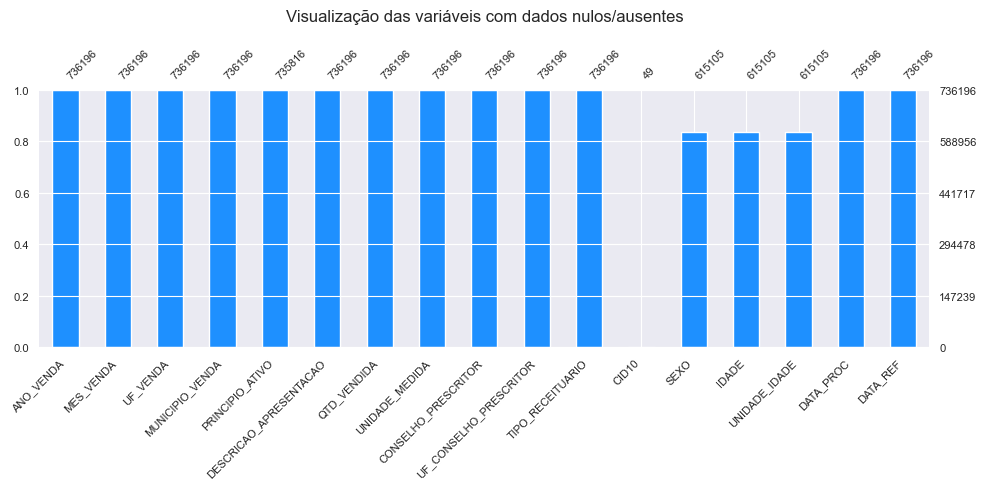

In [12]:
fn.grafico_bar_valores_nulos(df)



In [13]:
df_nulls = df[df[['PRINCIPIO_ATIVO']].isnull().any(axis=1)]
df_nulls = df_nulls.groupby(['DESCRICAO_APRESENTACAO']).size() \
    .reset_index(name='Quantidade')
df_nulls


,DESCRICAO_APRESENTACAO,Quantidade
0,10 MG COM REV CT BL AL/AL X 30,29
1,10 MG COM REV CT BL AL/AL X 60,13
2,2 MG COM CT 2 BL AL PLAS INC X 15,1
3,20 MG COM REV CT BL AL/AL X 30,5
4,250 MG COM REV CT 5 BL AL/AL X 2,1
5,3 MG/ML SOL OFT CT FR PLAS OPC GOT X 5 ML,183
6,"37,5 MG CAP GEL DURA LIB PROL CT BL PLAS OPC X 30",15
7,50 MG COM CX 2 BL AL PLAS INC X 15,5
8,500 MG CAP GEL DURA CT 2 BL AL PLAS INC X 4,8
9,500 MG COM REV CT 2 BL AL PVDC LEIT X 7,3


In [14]:
arr = np.unique(df_nulls['DESCRICAO_APRESENTACAO'])
for a in arr:
    try:
        df_t = df[df['DESCRICAO_APRESENTACAO'] == a]
        moda_principio_ativo = df_t['PRINCIPIO_ATIVO'].mode()[0]
        df.loc[(df['DESCRICAO_APRESENTACAO'] == a) &
               (df['PRINCIPIO_ATIVO'].isnull()), 'PRINCIPIO_ATIVO'] = moda_principio_ativo
    except:
        continue

df = df.dropna(subset=['PRINCIPIO_ATIVO'])
qtde_nulos = df['PRINCIPIO_ATIVO'].isnull().sum()
print(f'\nQuantidade de registros nulos na coluna PRINCIPIO_ATIVO: {qtde_nulos}')



Quantidade de registros nulos na coluna PRINCIPIO_ATIVO: 0


In [15]:
df = df.drop(columns='CID10')

In [16]:
df_nulls = df[df[['SEXO']].isnull().any(axis=1)]
df_nulls = df_nulls.groupby(['CONSELHO_PRESCRITOR']).size() \
    .reset_index(name='Quantidade')
df_nulls

,CONSELHO_PRESCRITOR,Quantidade
0,CRM,88796
1,CRMV,19748
2,CRO,9301
3,RMS,3207


In [17]:
df.loc[(df['CONSELHO_PRESCRITOR'] == 'CRMV') & (df['SEXO'].isnull()), 'SEXO'] = 3

moda_sexo = df['SEXO'].mode()[0]
df['SEXO'].fillna(moda_sexo, inplace=True)

qtde_nulos = df['SEXO'].isnull().sum()
print(f'\nQuantidade de registros nulos na coluna SEXO: {qtde_nulos}')


Quantidade de registros nulos na coluna SEXO: 0


In [18]:
df.loc[df['UNIDADE_IDADE'] == 2, 'IDADE'] /= 12


In [19]:
df_nulls = df[df[['IDADE']].isnull().any(axis=1)]
df_nulls = df_nulls.groupby(['SEXO']).size() \
    .reset_index(name='Quantidade')
df_nulls

,SEXO,Quantidade
0,1.0,101304
1,3.0,19748


In [20]:
df.loc[df['SEXO'] == 3, 'IDADE'] = -1
media_idade = df['IDADE'].median()
df['IDADE'].fillna(media_idade, inplace=True)

qtde_nulos = df['IDADE'].isnull().sum()
print(f'\nQuantidade de registros nulos na coluna IDADE: {qtde_nulos}')


Quantidade de registros nulos na coluna IDADE: 0


In [21]:
df = df.drop(columns='UNIDADE_IDADE')

In [22]:

#teste=df.groupby(['PRINCIPIO_ATIVO','DESCRICAO_APRESENTACAO']).size() \
#        .reset_index(name='QTDE') \
#        .sort_values(by='QTDE', ascending=False)
#teste

In [23]:
#teste=df.loc[df['IDADE'] < 1]
#teste.to_csv('teste.csv')

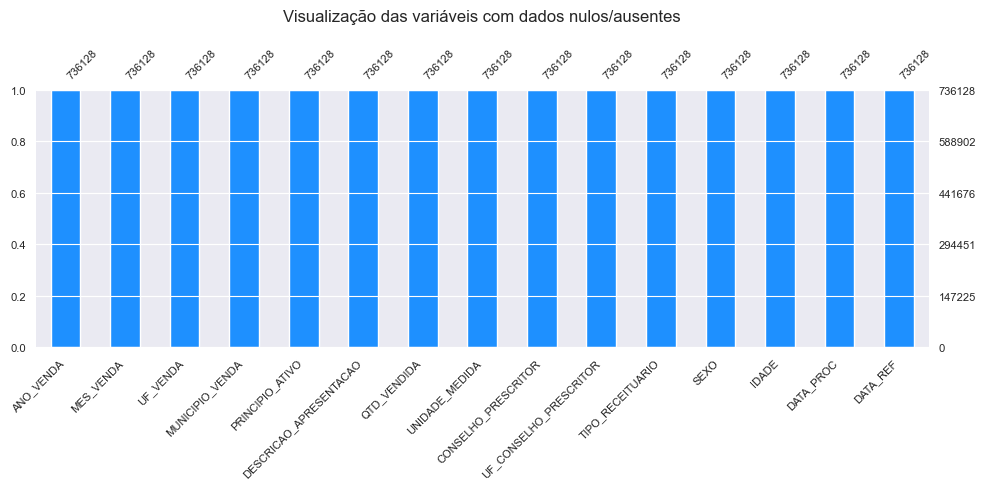

In [24]:
fn.grafico_bar_valores_nulos(df)

###  4. Análise da cardinalidade

In [25]:
cols = df.columns
qtde_unicos = 12

for col in cols:
    if df[col].nunique() <= qtde_unicos:
        data = pd.DataFrame(fn.exibe_valores_unicos(df[col]))
        display(data)


ANO_VENDA,2020,2021
Quantidade,186278,549850


MES_VENDA,1,2,3,4,5,6,7,8,9,10,11,12
Quantidade,65849,59809,66261,56793,59672,59024,60112,60464,61866,61342,61838,63098


UF_VENDA,SP
Quantidade,736128


MUNICIPIO_VENDA,BERTIOGA,CUBATÃO,GUARUJÁ,ITANHAÉM,MONGAGUÁ,PERUÍBE,PRAIA GRANDE,SANTOS,SÃO VICENTE
Quantidade,34642,41301,94772,42733,32739,44897,126250,214309,104485


UNIDADE_MEDIDA,CAIXA,FRASCO
Quantidade,651214,84914


CONSELHO_PRESCRITOR,CRM,CRMV,CRO,RMS
Quantidade,626285,19748,85618,4477


TIPO_RECEITUARIO,1,2,3,4,5
Quantidade,103093,14531,2353,2825,613326


SEXO,1.0,2.0,3.0
Quantidade,462612,253768,19748


DATA_PROC,2023-10-25
Quantidade,736128


DATA_REF,2020-10-01,2020-11-01,2020-12-01,2021-01-01,2021-02-01,2021-03-01,2021-04-01,2021-05-01,2021-06-01,2021-07-01,2021-08-01,2021-09-01
Quantidade,61342,61838,63098,65849,59809,66261,56793,59672,59024,60112,60464,61866


In [26]:
fn.gerar_metadados(df)

,Variável,Tipo,Qtde de nulos,% de nulos,Cardinalidade
0,ANO_VENDA,int32,0,0.0,2
1,MES_VENDA,int32,0,0.0,12
2,UF_VENDA,object,0,0.0,1
3,MUNICIPIO_VENDA,object,0,0.0,9
4,PRINCIPIO_ATIVO,object,0,0.0,293
5,DESCRICAO_APRESENTACAO,object,0,0.0,1906
6,QTD_VENDIDA,int32,0,0.0,757
7,UNIDADE_MEDIDA,object,0,0.0,2
8,CONSELHO_PRESCRITOR,object,0,0.0,4
9,UF_CONSELHO_PRESCRITOR,object,0,0.0,27


## 5. Análise das medidas estatísticas dos dados

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ANO_VENDA,736128.0,2020.746949,0.434760,2020.0,2020.0,2021.0,2021.0,2021.0
MES_VENDA,736128.0,6.488043,3.490513,1.0,3.0,7.0,10.0,12.0
QTD_VENDIDA,736128.0,4.787557,46.050546,1.0,1.0,1.0,2.0,32021.0
TIPO_RECEITUARIO,736128.0,4.370360,1.427795,1.0,5.0,5.0,5.0,5.0
SEXO,736128.0,1.398387,0.541599,1.0,1.0,1.0,2.0,3.0
IDADE,736128.0,41.894318,23.840590,-1.0,28.0,42.0,57.0,993.0


In [28]:
cols = df.select_dtypes(include=['object', 'category']).columns
df[cols].describe().T

,count,unique,top,freq
UF_VENDA,736128,1,SP,736128
MUNICIPIO_VENDA,736128,9,SANTOS,214309
PRINCIPIO_ATIVO,736128,293,AZITROMICINA DI-HIDRATADA,85240
DESCRICAO_APRESENTACAO,736128,1906,500 MG CAP DURA CT BL AL PLAS TRANS X 21,29660
UNIDADE_MEDIDA,736128,2,CAIXA,651214
CONSELHO_PRESCRITOR,736128,4,CRM,626285
UF_CONSELHO_PRESCRITOR,736128,27,SP,721745
DATA_PROC,736128,1,2023-10-25,736128
DATA_REF,736128,12,2021-03-01,66261


### 1. Distribuição dos dados e identificação de outliers

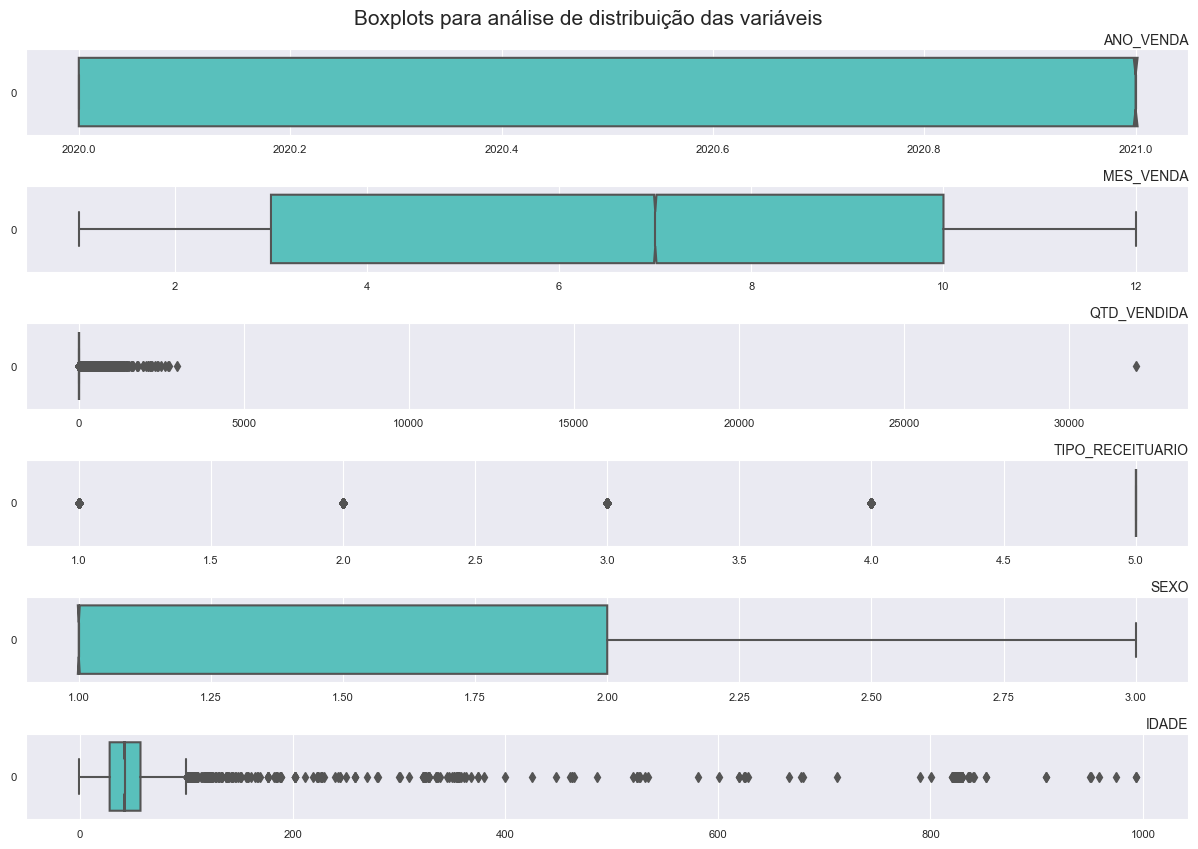

In [29]:
def graf_boxplot(dataframe):
    '''
    Plota vários boxplots de acordo com o número de colunas.

    :param dataframe: DataFrame
        DataFrame a ser analisado.
    '''
    coluna = dataframe.select_dtypes(exclude=['object', 'category']).columns

    fig, axs = plt.subplots(nrows=len(coluna), ncols=1,
                            figsize=(15, 10), gridspec_kw={'hspace': 0.6})

    plt.suptitle(
        'Boxplots para análise de distribuição das variáveis', fontsize=15, y=0.92)

    for i, col in enumerate(coluna):
        sns.boxplot(data=dataframe[col], ax=axs[i],
                    notch=True, orient='h', color='mediumturquoise')
        axs[i].set(xlabel='', ylabel='')
        axs[i].tick_params(labelsize=8)
        axs[i].ticklabel_format(style='plain', axis='x')
        axs[i].set_title(f'{col}', loc='right', fontsize=10, pad=4)

    plt.tight_layout()
    plt.show()


graf_boxplot(df)